In [54]:
### Laddar in modeller som ska kombineras
from keras.models import load_model

face = load_model(r'C:\Users\leona\Desktop\Data Science\face.tf')
speech = load_model(r'C:\Users\leona\Desktop\Data Science\speechgg2lt.tf')

In [55]:
# För att undvika namnkonflikter när modellerna kombineras, lägg till ett suffix på alla lager i talmodellen.
# Detta är för att hantera en potentiell bugg i Keras.
for i, layer in enumerate(speech.layers):
    layer._name = layer._name + str("_1")

In [22]:
# Checkar att namnen har ändrats
for i, layer in enumerate(speech.layers):
    print(layer, layer.name)

<keras.src.layers.rnn.lstm.LSTM object at 0x0000025BDE6F2390> lstm_7_____1
<keras.src.layers.core.dense.Dense object at 0x0000025BDBAEEB50> dense_21_____1
<keras.src.layers.regularization.dropout.Dropout object at 0x0000025BDE878850> dropout_14_____1
<keras.src.layers.core.dense.Dense object at 0x0000025BDE878A10> dense_22_____1
<keras.src.layers.regularization.dropout.Dropout object at 0x0000025BDE879F90> dropout_15_____1
<keras.src.layers.core.dense.Dense object at 0x0000025BDE87A890> dense_23_____1


In [47]:
# Laddar in bilddata som användes från modellen innan. 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

picture_size = 48
folder_path = 'D:/DataSets/images/images/Images Merge'

batch_size = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

### https://stackoverflow.com/questions/42284873/assign-imagedatagenerator-result-to-numpy-array
### https://www.bing.com/search?q=keras+ImageDataGenerator+to+np.array&qs=n&form=QBRE&sp=-1&lq=0&pq=keras+imagedatagenerator+to+np.array&sc=11-36&sk=&cvid=64B6BA2699D84DCDA7653B0DE6C00DE6&ghsh=0&ghacc=0&ghpl=

train_set = datagen_train.flow_from_directory(folder_path+'train',
                                              target_size = (picture_size, picture_size),
                                              color_mode ='grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

test_set = datagen_train.flow_from_directory(folder_path+'validation',
                                              target_size = (picture_size, picture_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)

Found 2800 images belonging to 7 classes.
Found 0 images belonging to 0 classes.


In [48]:
# Konvertera data till numpy arrays för att säkerställa att all data som matas in i modellen har samma datatype
# Datan kommer att vara numpy arrays.

x_train=np.concatenate([train_set.next()[0] for i in range(train_set.__len__())])
y_train=np.concatenate([train_set.next()[1] for i in range(train_set.__len__())])
print(x_train.shape)
print(y_train.shape)

(2800, 48, 48, 1)
(2800, 7)


In [6]:
# Konvertera data till numpy arrays för att säkerställa att all data som matas in i modellen har samma datatype
# Datan kommer att vara numpy arrays.

x_test=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y_test=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])
print(x_test.shape)
print(y_test.shape)

(7066, 48, 48, 1)
(7066, 7)


In [7]:
train_set

In [8]:
#type(train_set)
type(test_set)

keras.src.preprocessing.image.DirectoryIterator

In [32]:
paths = []
labels = []

def sorting_sounds(emotion):
    # Laddar datasetet och extraherar filvägar och etiketter från filnamnen
#labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

    x = 0
    # Traversera alla filer i datasetets katalogstruktur
    for dirname, _, filenames in os.walk(r'D:\DataSets\AudioWAV'):
        for filename in filenames:
            # Lagra fullständig filväg

            label = filename.split('_')[-2]
            if label == emotion and not label == 'DIS':
                paths.append(os.path.join(dirname, filename))
                labels.append(label.lower())

            elif label == 'DIS' and emotion == 'DIS' and x < 436:
                paths.append(os.path.join(dirname, filename))
                labels.append(label.lower())
                x += 1
            # Extrahera etikett från filnamnet
            

                
            #label = label.split('.')[0]
            #print(label)
            
        print('Dataset is loaded')

In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

sorting_sounds('ANG')
sorting_sounds('DIS')
sorting_sounds('FEA')
sorting_sounds('HAP')
sorting_sounds('NEU')
sorting_sounds('SAD')

## create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels

df['labels']= df['labels'].replace({'ps': 'surprise'})

def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

X = [x for x in X_mfcc]
X = np.array(X)
X = np.expand_dims(X, -1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])
y = y.toarray()


2
DIS
1
2
DIS
2
2
DIS
3
2
DIS
4
2
DIS
5
2
DIS
6
2
DIS
7
2
DIS
8
2
DIS
9
2
DIS
10
2
DIS
11
2
DIS
12
2
DIS
13
2
DIS
14
2
DIS
15
2
DIS
16
2
DIS
17
2
DIS
18
2
DIS
19
2
DIS
20
2
DIS
21
2
DIS
22
2
DIS
23
2
DIS
24
2
DIS
25
2
DIS
26
2
DIS
27
2
DIS
28
2
DIS
29
2
DIS
30
2
DIS
31
2
DIS
32
2
DIS
33
2
DIS
34
2
DIS
35
2
DIS
36
2
DIS
37
2
DIS
38
2
DIS
39
2
DIS
40
2
DIS
41
2
DIS
42
2
DIS
43
2
DIS
44
2
DIS
45
2
DIS
46
2
DIS
47
2
DIS
48
2
DIS
49
2
DIS
50
2
DIS
51
2
DIS
52
2
DIS
53
2
DIS
54
2
DIS
55
2
DIS
56
2
DIS
57
2
DIS
58
2
DIS
59
2
DIS
60
2
DIS
61
2
DIS
62
2
DIS
63
2
DIS
64
2
DIS
65
2
DIS
66
2
DIS
67
2
DIS
68
2
DIS
69
2
DIS
70
2
DIS
71
2
DIS
72
2
DIS
73
2
DIS
74
2
DIS
75
2
DIS
76
2
DIS
77
2
DIS
78
2
DIS
79
2
DIS
80
2
DIS
81
2
DIS
82
2
DIS
83
2
DIS
84
2
DIS
85
2
DIS
86
2
DIS
87
2
DIS
88
2
DIS
89
2
DIS
90
2
DIS
91
2
DIS
92
2
DIS
93
2
DIS
94
2
DIS
95
2
DIS
96
2
DIS
97
2
DIS
98
2
DIS
99
2
DIS
100
2
DIS
101
2
DIS
102
2
DIS
103
2
DIS
104
2
DIS
105
2
DIS
106
2
DIS
107
2
DIS
108
2
DIS
109
2
DIS
110
2
DIS
11

In [53]:
# Laddar in ljuddata som ska användas för att träna den nya modellen

#Audio data
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

paths = []
labels = []
for dirname, _, filenames in os.walk('D:\DataSets\TESS Toronto emotional speech set data 2'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())
print('Dataset is loaded')

## create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['labels'] = labels

df['labels']= df['labels'].replace({'ps': 'surprise'})

def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

X = [x for x in X_mfcc]
X = np.array(X)
X = np.expand_dims(X, -1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])
y = y.toarray()



Dataset is loaded


In [10]:
X[0].shape

(40, 1)

In [56]:
# Detta görs för att kombinera de två sparade modellerna för ansikts- och taligenkänning

from keras.layers import Concatenate, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras import metrics

# Skapar en ny modell som kombinerar utgångarna från ansikts- och talmodellerna
merged_output = Concatenate()([face.output, speech.output])

# Första nya fullt anslutna lagret för att kombinera funktioner från båda modellerna
new_layer = Dense(256, activation='relu')(merged_output)
new_layer = Dropout(0.2)(new_layer)  # Förhindrar överanpassning

# Andra nya fullt anslutna lagret för ytterligare funktionkombination
new_layer = Dense(128, activation='relu')(new_layer)

# Utgångslager med softmax-aktivering för klassificering i 6 kategorier
new_layer = Dense(6, activation='softmax')(new_layer)

# Skapar den nya kombinerade modellen med båda ingångarna och det nya utgångslagret
new_model = Model([face.input, speech.input], new_layer)

# Kompilering av den nya modellen med Adam-optimizer och kategorisk korsentropi som förlustfunktion
opt = Adam(learning_rate=0.0001)
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])

# Sammanfattar arkitekturen för den nya kombinerade modellen
new_model.summary()



Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_input (InputLayer)   [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 64)           640       ['conv2d_input[0][0]']        
                                                                                                  
 batch_normalization (Batch  (None, 48, 48, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 48, 48, 64)           0         ['batch_normalization[0]

 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 128)          0         ['activation_1[0][0]']        
 g2D)                                                                                             
                                                                                                  
 dropout_1 (Dropout)         (None, 12, 12, 128)          0         ['max_pooling2d_1[0][0]']     
                                                                                                  
 conv2d_2 (Conv2D)           (None, 12, 12, 512)          590336    ['dropout_1[0][0]']           
                                                                                                  
 batch_normalization_2 (Bat  (None, 12, 12, 512)          2048      ['conv2d_2[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activatio

In [57]:
# Sparar modellen så att den kan användas senare, samt tillämpar olika regulariseringsmetoder för att förbättra modellen

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Checkpoint för att spara den bästa modellen baserat på valideringsnoggrannhet
checkpoint = ModelCheckpoint("./fn.tf", monitor="val_categorical_accuracy", verbose=1, save_best_only=True, mode='max')

# Early stopping för att avbryta träningen när noggrannheten slutar förbättras för att undvika överträning
early_stopping = EarlyStopping(monitor='categorical_accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)

# Reduce learning rate on plateau för att minska inlärningshastigheten när noggrannheten slutar förbättras
reduce_learningrate = ReduceLROnPlateau(monitor='categorical_accuracy',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

In [58]:
# Tränar modellen med träningsdata och validerar med valideringsdata
# Använder callbacks för att spara bästa modell, avbryta vid överträning och justera inlärningshastigheten

history = new_model.fit(          
    x=[x_train, X],
    y=[y_train, y], 
    steps_per_epoch= 35, ###train_set.n//train_set.batch_size,
    epochs=epochs, 
    validation_split=0.20,
    validation_steps= 9, ###test_set.n//test_set.batch_size,
    callbacks=callbacks_list
    )

Epoch 1/48
35/35 [==============================] - ETA: 0s - loss: 1.9479 - categorical_accuracy: 0.1509
Epoch 1: val_categorical_accuracy improved from -inf to 0.13929, saving model to .\fn.tf
INFO:tensorflow:Assets written to: .\fn.tf\assets


INFO:tensorflow:Assets written to: .\fn.tf\assets


35/35 [==============================] - 41s 1s/step - loss: 1.9479 - categorical_accuracy: 0.1509 - val_loss: 1.9531 - val_categorical_accuracy: 0.1393 - lr: 1.0000e-04
Epoch 2/48
35/35 [==============================] - ETA: 0s - loss: 1.9453 - categorical_accuracy: 0.1402
Epoch 2: val_categorical_accuracy did not improve from 0.13929
35/35 [==============================] - 31s 887ms/step - loss: 1.9453 - categorical_accuracy: 0.1402 - val_loss: 1.9535 - val_categorical_accuracy: 0.1321 - lr: 1.0000e-04
Epoch 3/48
35/35 [==============================] - ETA: 0s - loss: 1.9416 - categorical_accuracy: 0.1598
Epoch 3: val_categorical_accuracy did not improve from 0.13929
35/35 [==============================] - 32s 903ms/step - loss: 1.9416 - categorical_accuracy: 0.1598 - val_loss: 1.9533 - val_categorical_accuracy: 0.1232 - lr: 1.0000e-04
Epoch 4/48
35/35 [==============================] - ETA: 0s - loss: 1.9382 - categorical_accuracy: 0.1696
Epoch 4: val_categorical_accuracy did no

INFO:tensorflow:Assets written to: .\fn.tf\assets


35/35 [==============================] - 42s 1s/step - loss: 1.4237 - categorical_accuracy: 0.4420 - val_loss: 2.3894 - val_categorical_accuracy: 0.1411 - lr: 1.0000e-04
Epoch 36/48
35/35 [==============================] - ETA: 0s - loss: 1.4099 - categorical_accuracy: 0.4299
Epoch 36: val_categorical_accuracy did not improve from 0.14107
35/35 [==============================] - 34s 978ms/step - loss: 1.4099 - categorical_accuracy: 0.4299 - val_loss: 2.4597 - val_categorical_accuracy: 0.1411 - lr: 1.0000e-04
Epoch 37/48
35/35 [==============================] - ETA: 0s - loss: 1.3893 - categorical_accuracy: 0.4397
Epoch 37: val_categorical_accuracy did not improve from 0.14107
35/35 [==============================] - 33s 942ms/step - loss: 1.3893 - categorical_accuracy: 0.4397 - val_loss: 2.4681 - val_categorical_accuracy: 0.1357 - lr: 1.0000e-04
Epoch 38/48
35/35 [==============================] - ETA: 0s - loss: 1.3793 - categorical_accuracy: 0.4504
Epoch 38: val_categorical_accuracy 

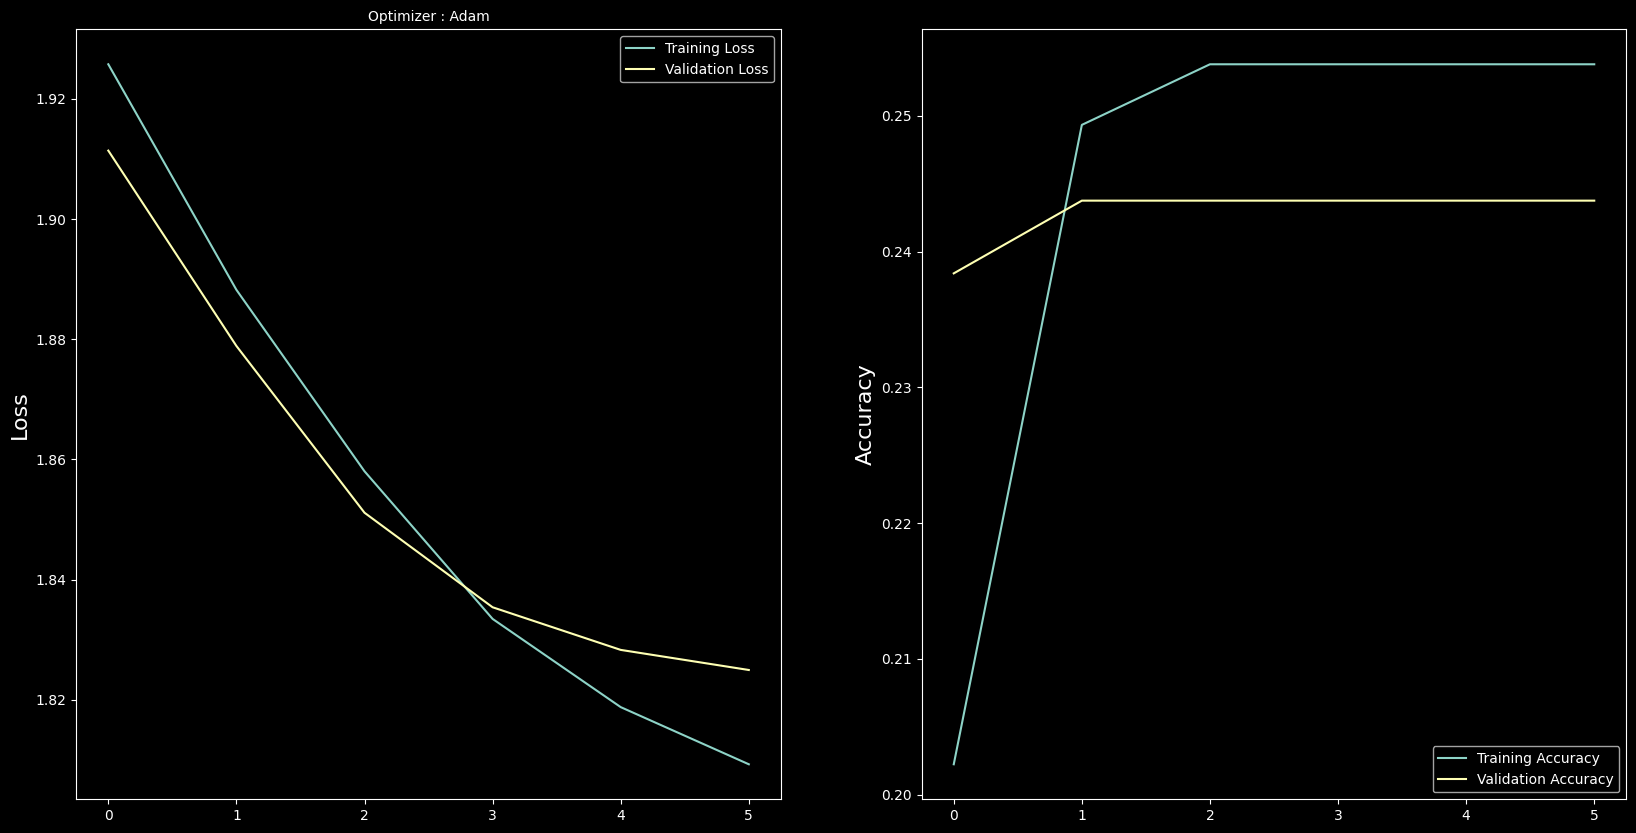

In [30]:
## Visualiserar tränings- och valideringsförlust samt noggrannhet för att bedöma modellens prestanda och avgöra om ytterligare träning behövs

plt.style.use('dark_background')

plt.figure(figsize=(20, 10))

# Plot för tränings- och valideringsförlust

plt.subplot(1, 2, 1)
plt.title('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

# Plot för tränings- och valideringsnoggrannhet
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
### Säkerställer att modellen fungerar med rätt dimensioner
xf = x_test[150]
xs = X[150]

xf = np.expand_dims(xf, axis=0)
xs = np.expand_dims(xs, axis=0)

new_model.predict([xf, xs])[0]

1/1 [==============================] - 1s 936ms/step


array([0.1571774 , 0.07299937, 0.14312825, 0.19522908, 0.16006617,
       0.15313947, 0.1182602 ], dtype=float32)